In [244]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
import pandas as pd
import csv

In [245]:
date = []
temp = []

with open('../../data/data.csv') as data_file:
    csv_reader = csv.reader(data_file, delimiter=',')
    for row in csv_reader:
        date.append(row[0])
        temp.append(float(row[1]))

data_points_count = 12 * 50
x = np.array(list(range(0, data_points_count))).reshape((-1, 1));
y = np.array(temp[-1 * data_points_count:]);

formatted_dates = [datetime.strptime(d, '%Y%m') for d in date[-1 * data_points_count:]]


intercept: -0.010414198557958887
slope: [0.00151563]
0.7982243409547739


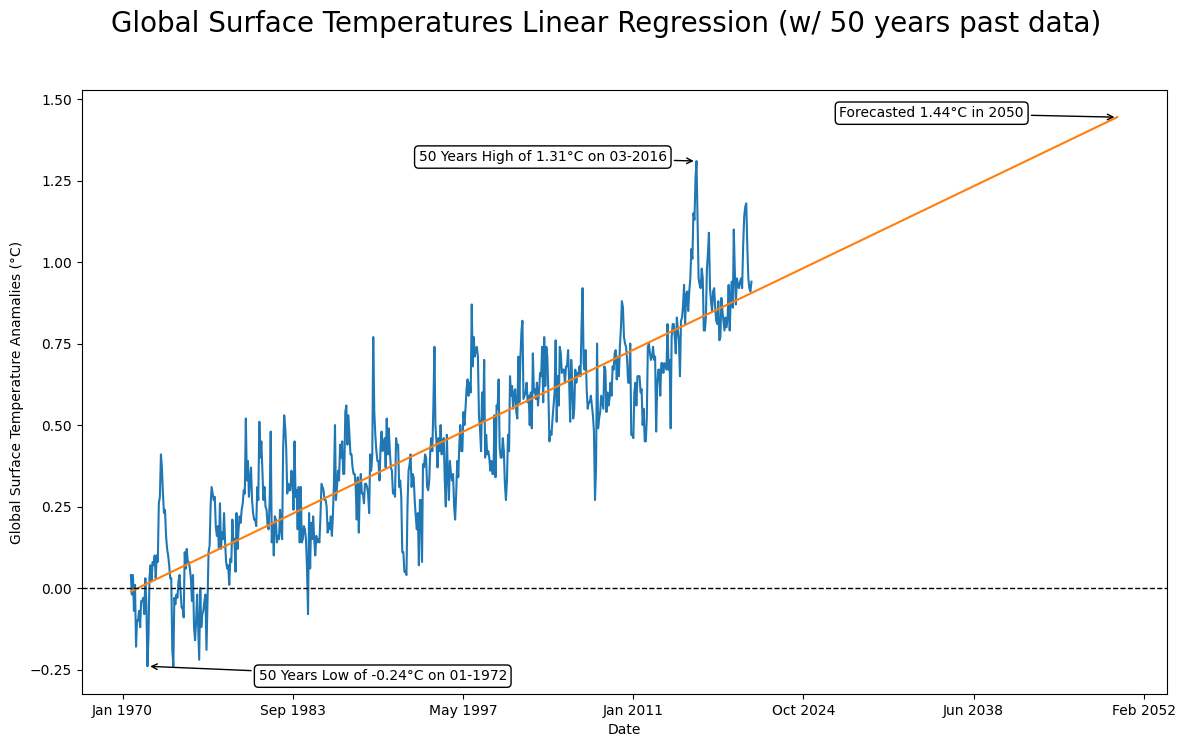

In [246]:
model = LinearRegression();
model.fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

r_sq = model.score(x, y)
print(r_sq)

x_dates = matplotlib.dates.date2num(formatted_dates)
formatted_x_dates = matplotlib.dates.DateFormatter('%b %Y')
fig = plt.figure(figsize=(14, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Global Surface Temperatures Linear Regression (w/ {int(data_points_count/12)} years past data)', fontsize=20)
subPlot = fig.add_subplot(1,1,1)
subPlot.xaxis.set_major_formatter(formatted_x_dates)
subPlot.plot(x_dates, y)
subPlot.set_xlabel('Date')
subPlot.set_ylabel('Global Surface Temperature Anamalies (°C)')

fifty_year_low_index = np.argmin(y)
fifty_year_high_index = np.argmax(y)

x2 = matplotlib.dates.date2num(datetime.strptime('01-2050', '%m-%Y'))
y2 = model.coef_ * (data_points_count + 30 * 12) + model.intercept_
subPlot.plot([x_dates[0], x2], [model.intercept_, y2])
# subPlot.plot([x_dates[0], x_dates[-1]], [model.intercept_, model.coef_ * (data_points_count) + model.intercept_])
subPlot.annotate(f'Forecasted {round(y2[-1],2)}°C in 2050', xy=(x2,y2), xytext=(-200,0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.axhline(0, color='black', lw=1, linestyle='--')
subPlot.annotate(f'50 Years High of {y[fifty_year_high_index]}°C on {formatted_dates[fifty_year_high_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_high_index],y[fifty_year_high_index]), xytext=(-200, 0), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
subPlot.annotate(f'50 Years Low of {y[fifty_year_low_index]}°C on {formatted_dates[fifty_year_low_index].strftime("%m-%Y")}', xy=(x_dates[fifty_year_low_index],y[fifty_year_low_index]), xytext=(80, -10), textcoords="offset points", bbox=dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
plt.show()

In [247]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
import math

date_parser = lambda d: datetime.strptime(d, '%Y%m')
index_data_df = pd.read_csv(
    '../../data/data.csv',
    names=['date', 'temp'],
    dtype={'date': 'str', 'temp': 'float'},
    parse_dates=['date'],
    date_parser=date_parser,
    index_col='date'
)

In [248]:
decompose_res = seasonal_decompose(index_data_df, model='additive', freq=12)
temp_np = decompose_res.trend

df = pd.read_csv(
    '../../data/data.csv',
    names=['date', 'temp'],
    dtype={'date': 'str', 'temp': 'float'},
    parse_dates=['date'],
    date_parser=date_parser
)

data_np = df.to_numpy()

x = np.array([matplotlib.dates.date2num(d) for i, d in enumerate(data_np[:,0]) if not math.isnan(temp_np[i])])
y = np.array([round(t, 5) for t in temp_np if not math.isnan(t)])


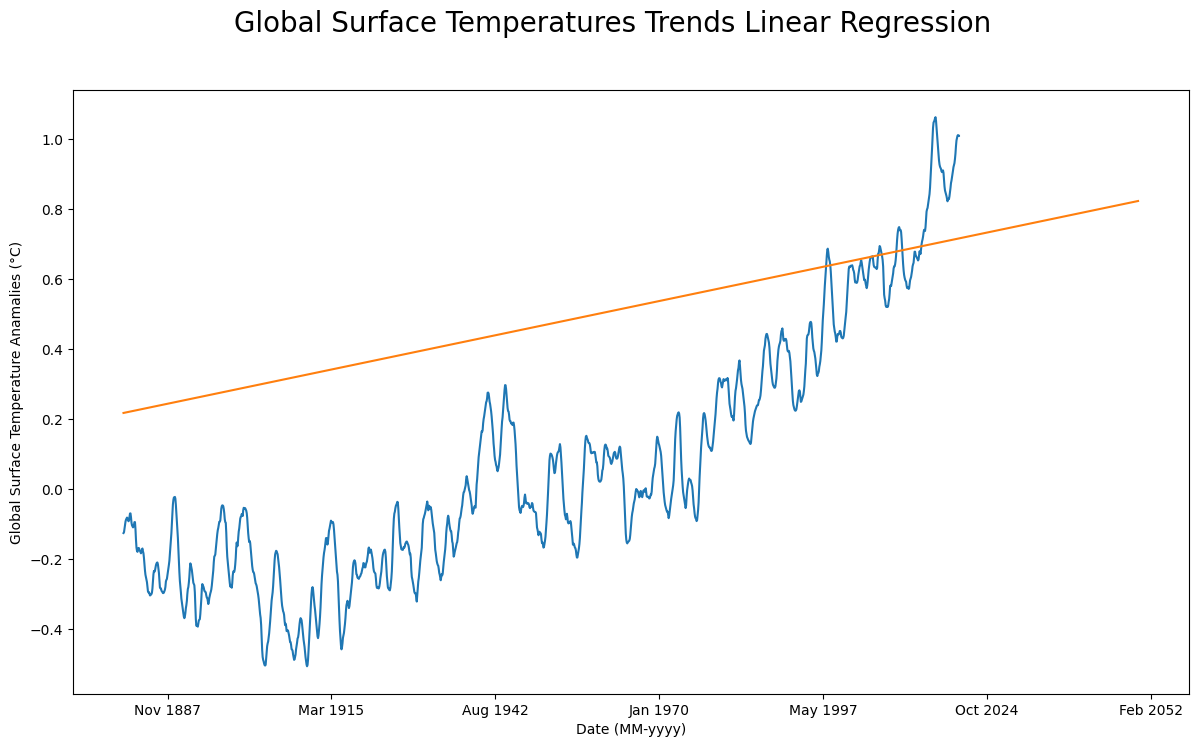

In [249]:
# Run linear regression forecast on trend line
linear_model = LinearRegression()
linear_model.fit(x.reshape((-1, 1)), y)

fig = plt.figure(figsize=(16, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Global Surface Temperatures Trends Linear Regression', fontsize=20)
sub_plot = fig.add_subplot(1,1,1)
sub_plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
sub_plot.set_xlabel('Date (MM-yyyy)')
sub_plot.set_ylabel('Global Surface Temperature Anamalies (°C)')
sub_plot.plot(x, y) # Plot main trend line
x2 = matplotlib.dates.date2num(datetime.strptime('01-2050', '%m-%Y'))
y2 = linear_model.coef_ * x2 + linear_model.intercept_
sub_plot.plot([x[0], x2], [linear_model.intercept_, y2]) # Plot linear regression line
plt.show()

[0.82286343]


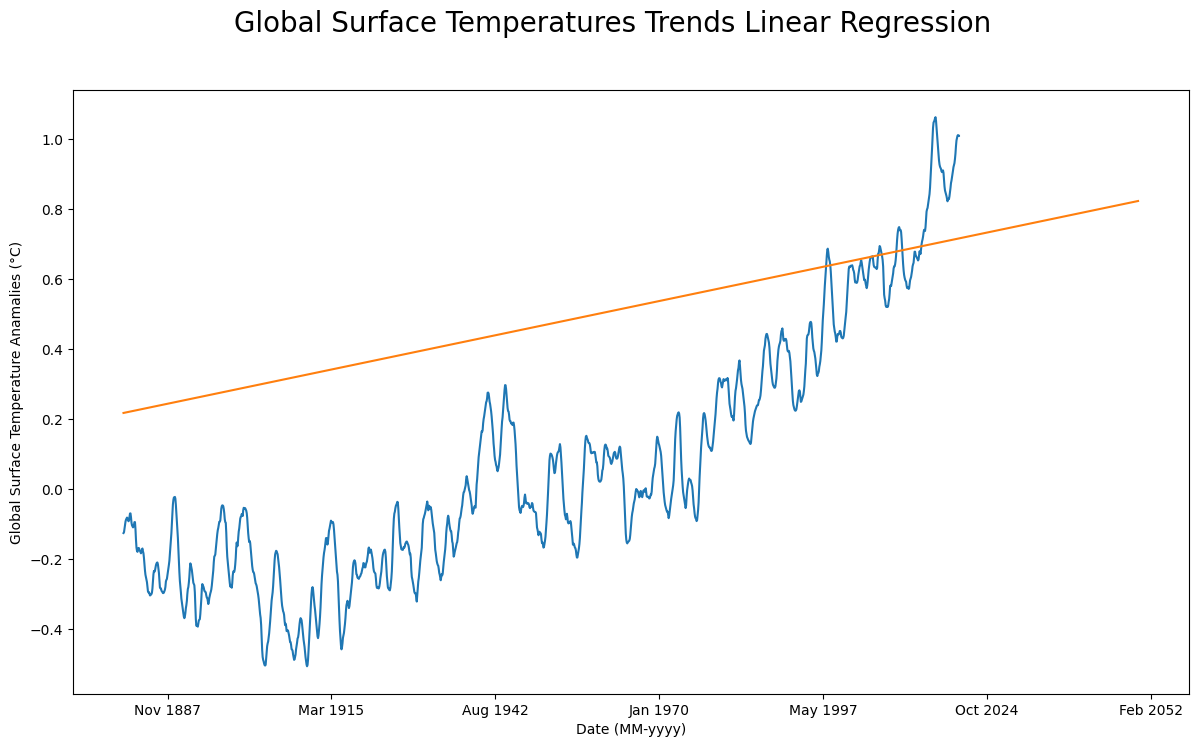

In [250]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Default alpha=1.0
ridge_model.fit(x.reshape((-1, 1)), y)

print(ridge_model.predict(matplotlib.dates.date2num(datetime.strptime('01-2050', '%m-%Y')).reshape((-1, 1))))

fig = plt.figure(figsize=(16, 8), dpi=100, facecolor='w', edgecolor='k')
fig.suptitle(f'Global Surface Temperatures Trends Linear Regression', fontsize=20)
sub_plot = fig.add_subplot(1,1,1)
sub_plot.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
sub_plot.set_xlabel('Date (MM-yyyy)')
sub_plot.set_ylabel('Global Surface Temperature Anamalies (°C)')
sub_plot.plot(x, y) # Plot main trend line
x2 = matplotlib.dates.date2num(datetime.strptime('01-2050', '%m-%Y'))
y2 = linear_model.coef_ * x2 + linear_model.intercept_
sub_plot.plot([x[0], x2], [linear_model.intercept_, y2]) # Plot ridge linear regression line
plt.show()